In [3]:
import torch
import os
import numpy as np
from plot import visualize

def inference(model, image, device):
    x_tensor = torch.from_numpy(image).to(device).unsqueeze(0)
    mask = model.predict(x_tensor)
    return mask.squeeze().cpu().numpy().round()

def inference_dataloader(
        model,
        test_dataset,
        device,
        ):
    # for i in range(len(test_dataset)):
    for i in range(10):
        name = os.path.basename(test_dataset.masks_fps[i])
        print(name)
        image_vis = test_dataset[i][0].transpose(1, 2, 0)
        image, gt_mask = test_dataset[i]
        pr_mask = inference(model, image, device)
        visualize( 
            image=image_vis, 
            ground_truth_mask=gt_mask.transpose(1, 2, 0)[...,0], 
            predicted_mask=pr_mask
            )

trainset: 842
validset: 211



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00001014.png


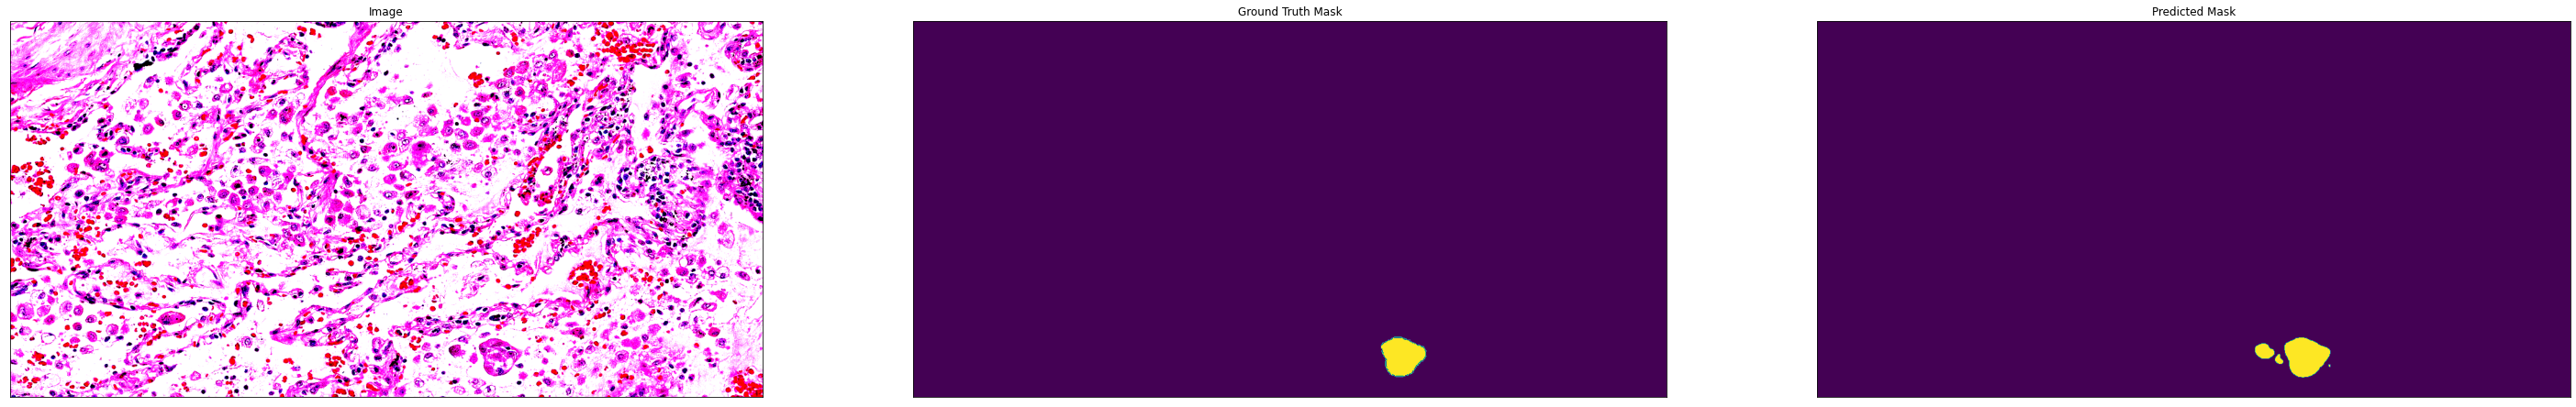

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000523.png


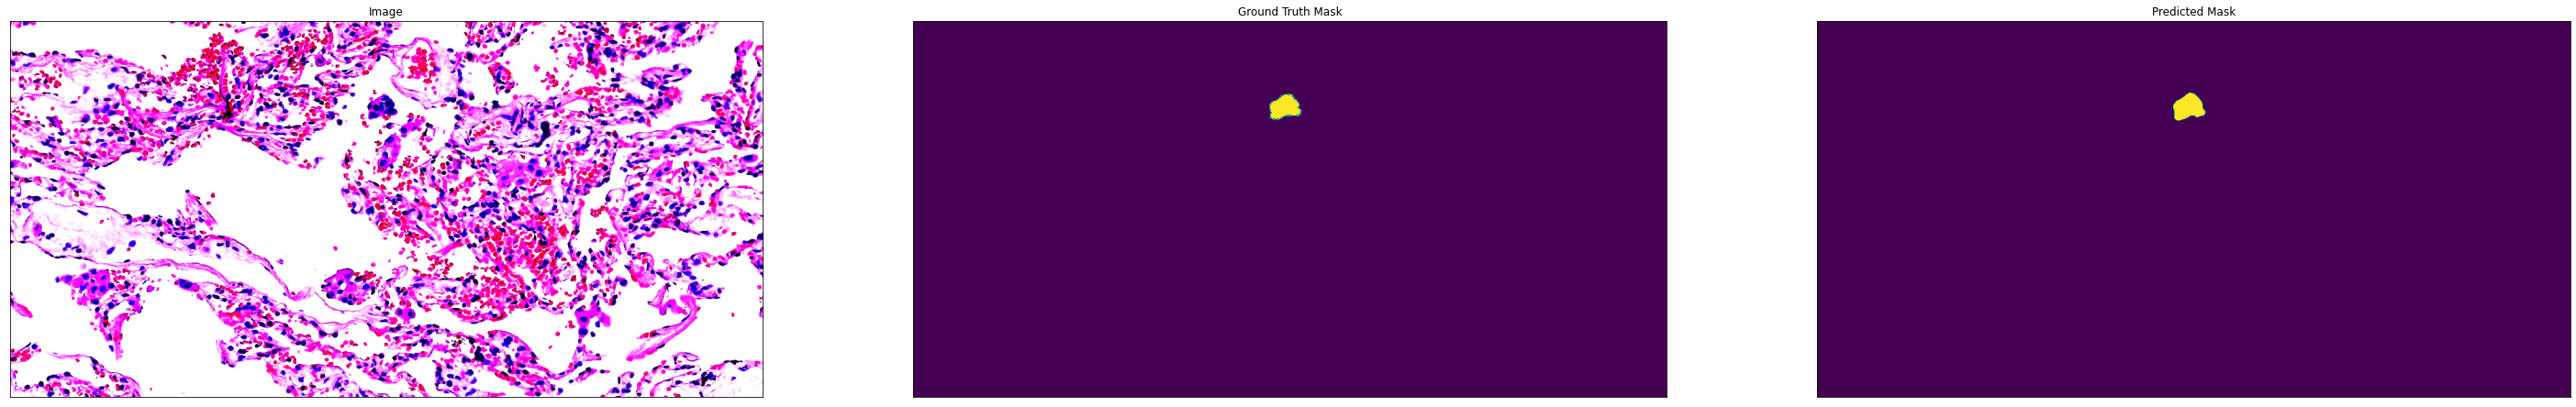

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000443.png


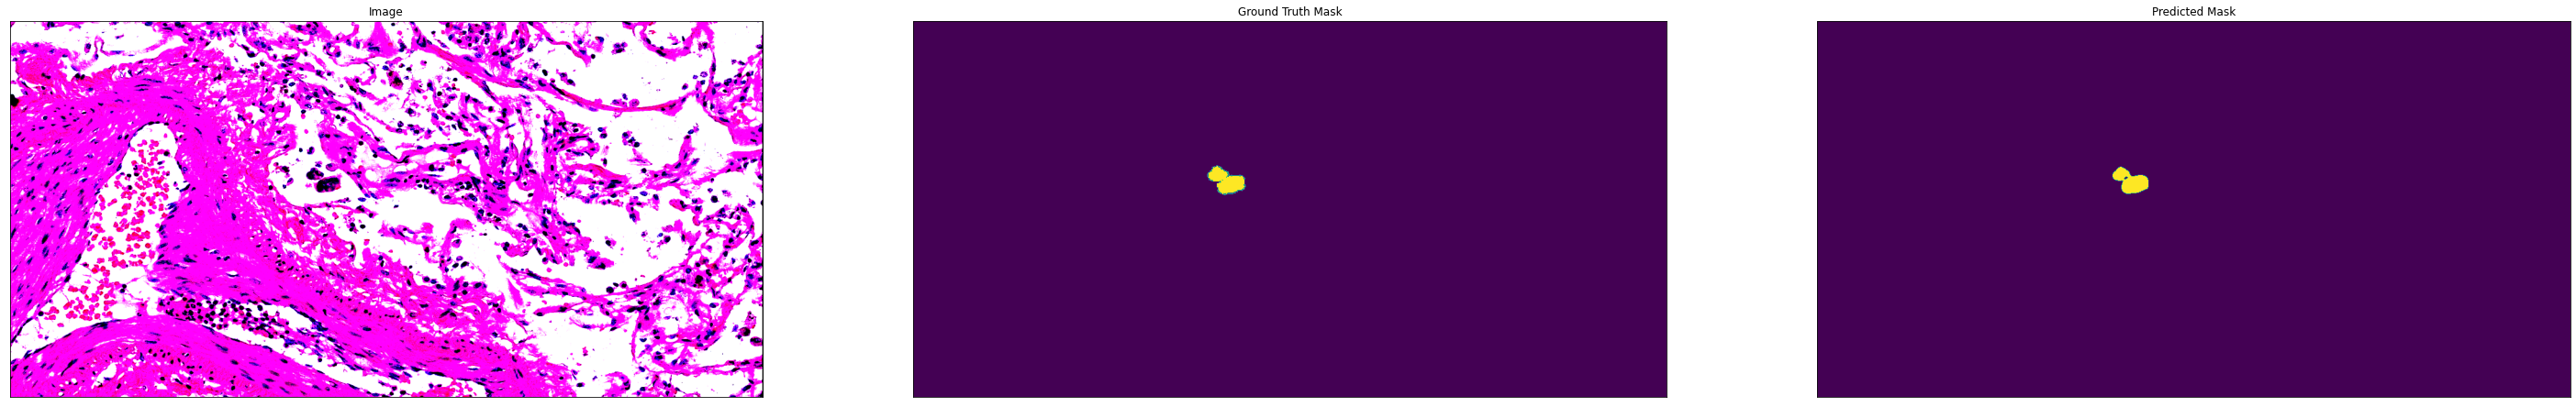

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000761.png


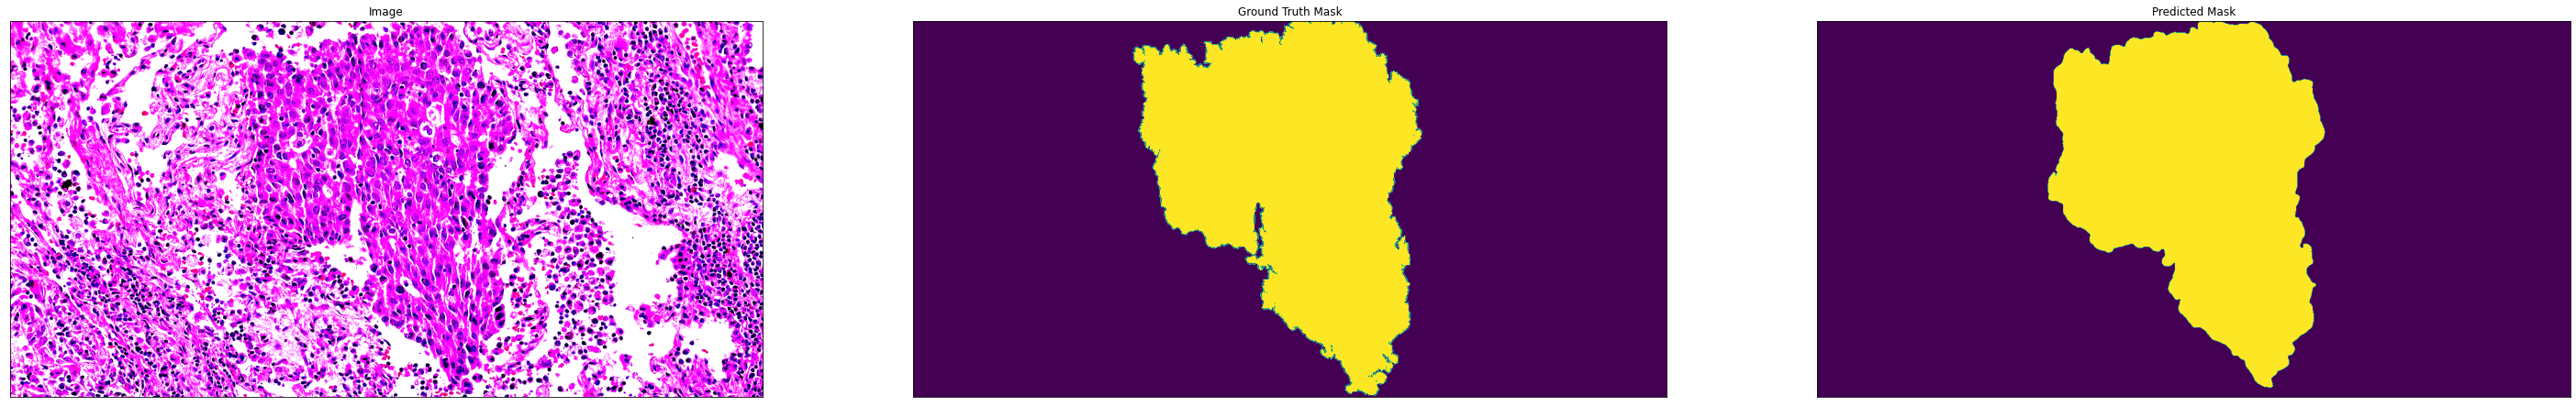

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00001017.png


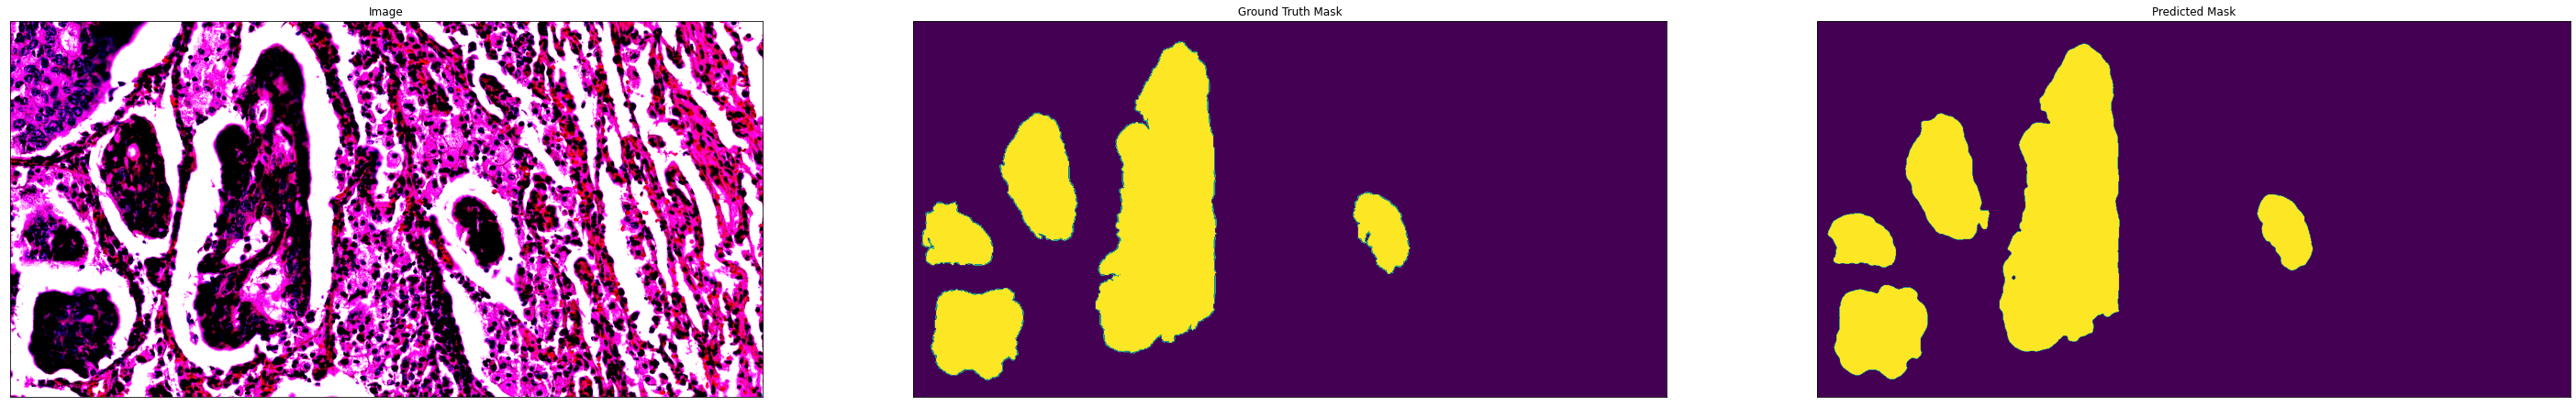

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000471.png


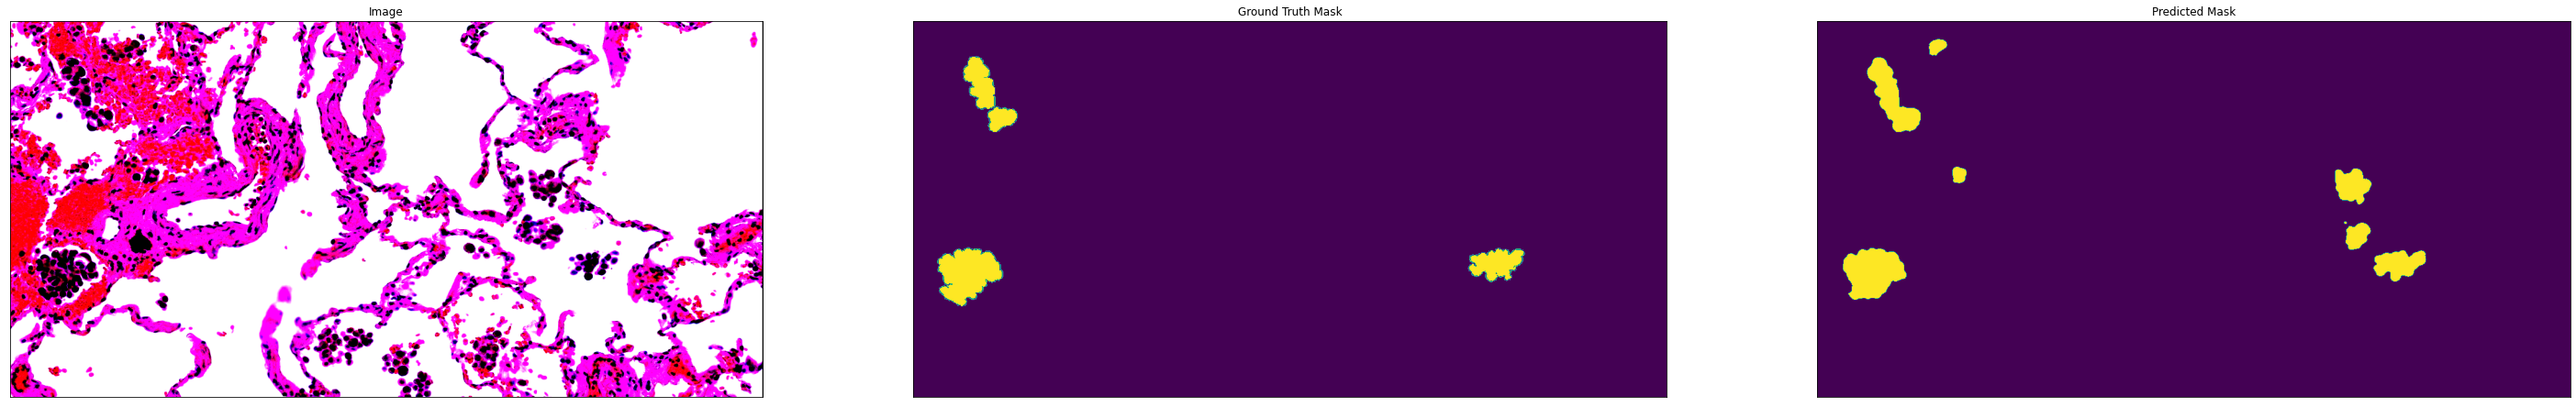

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000166.png


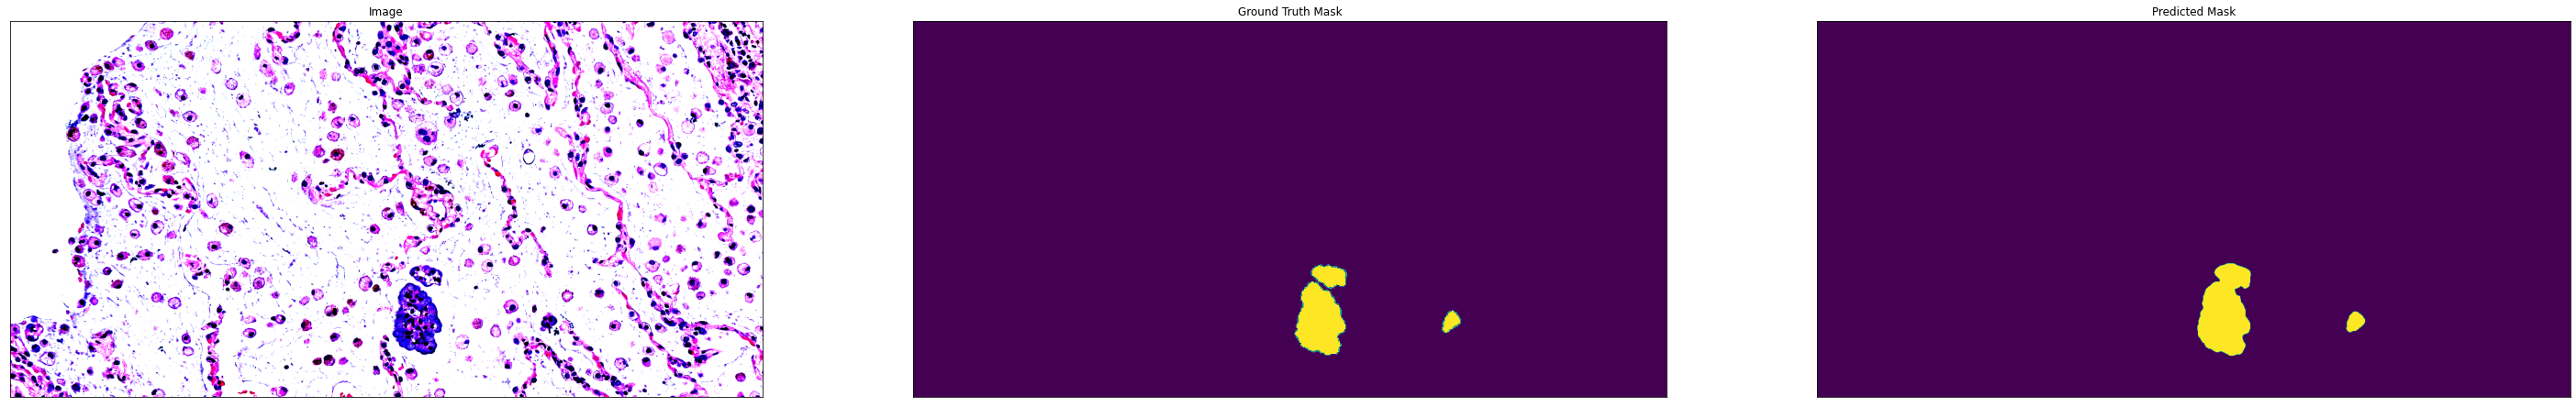

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000545.png


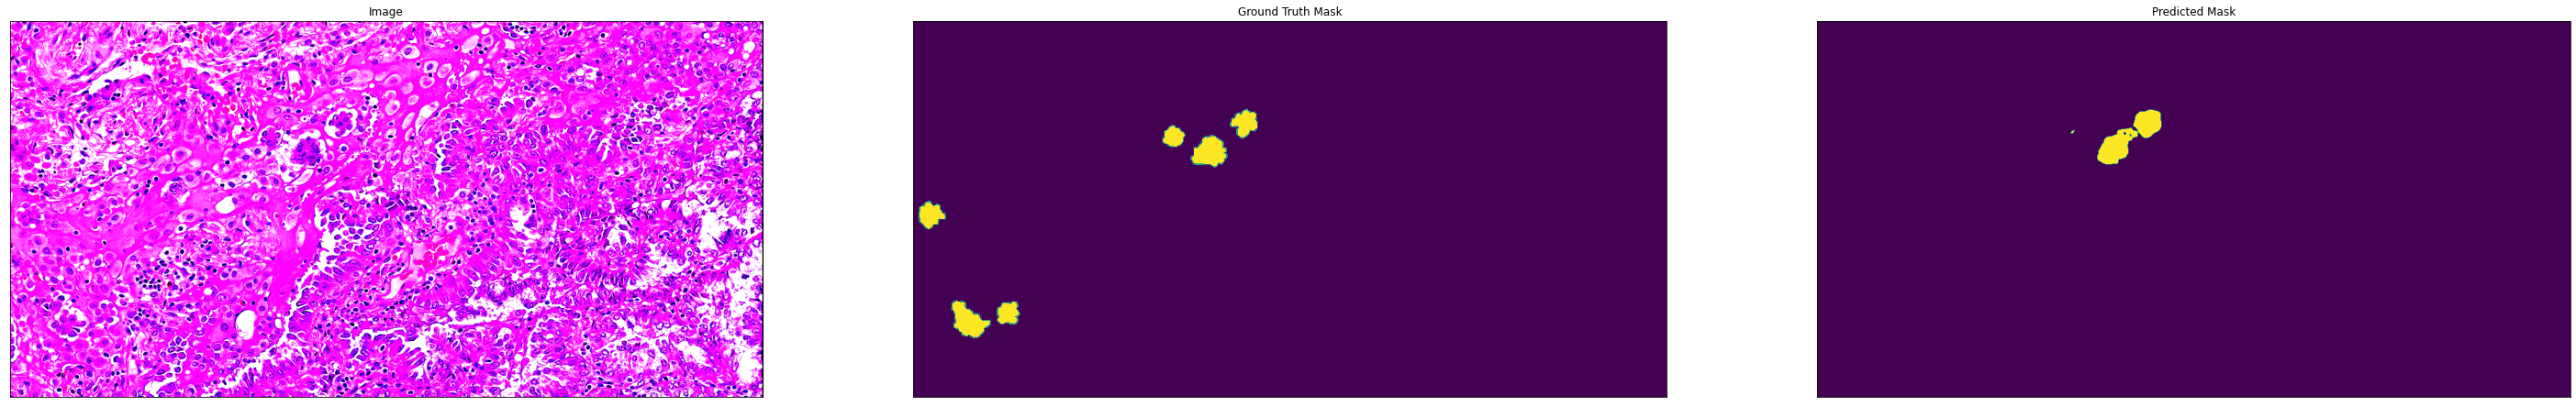

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000462.png


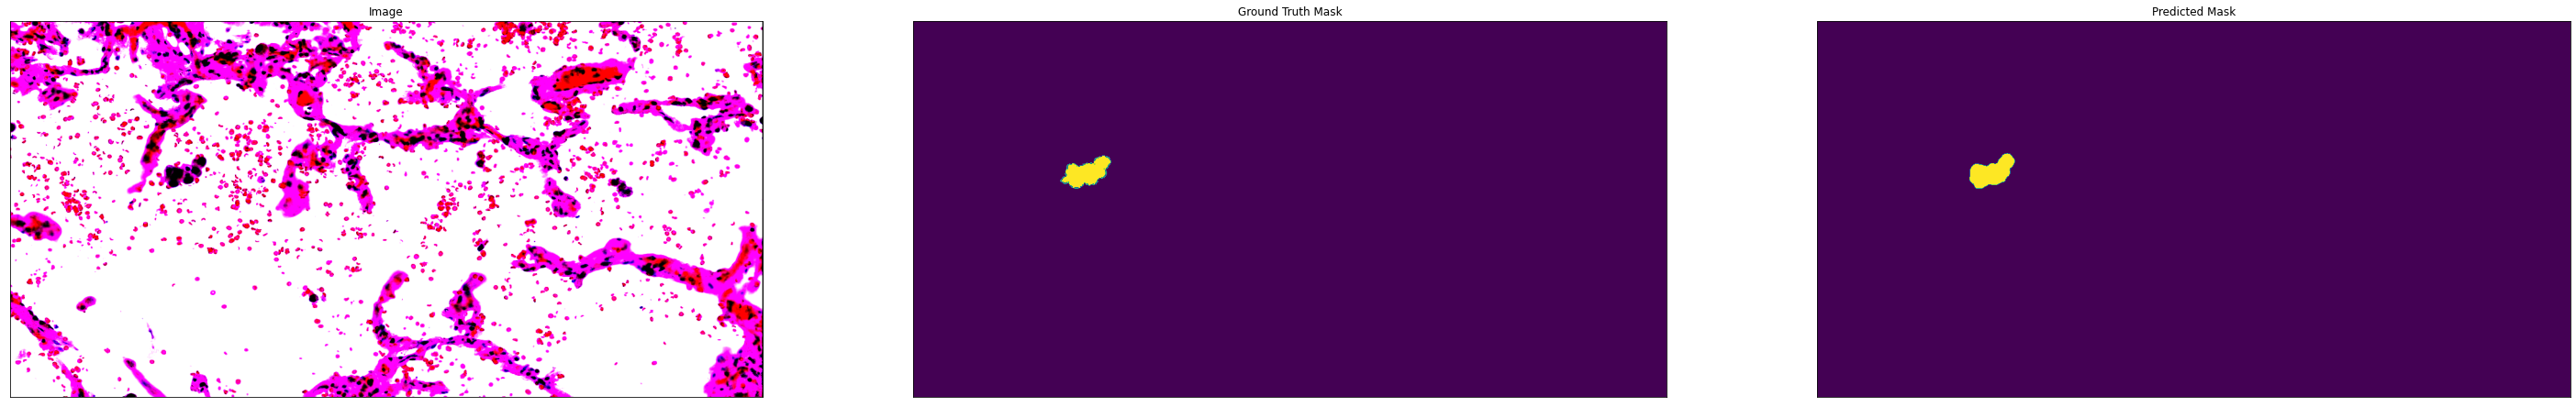

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


00000193.png


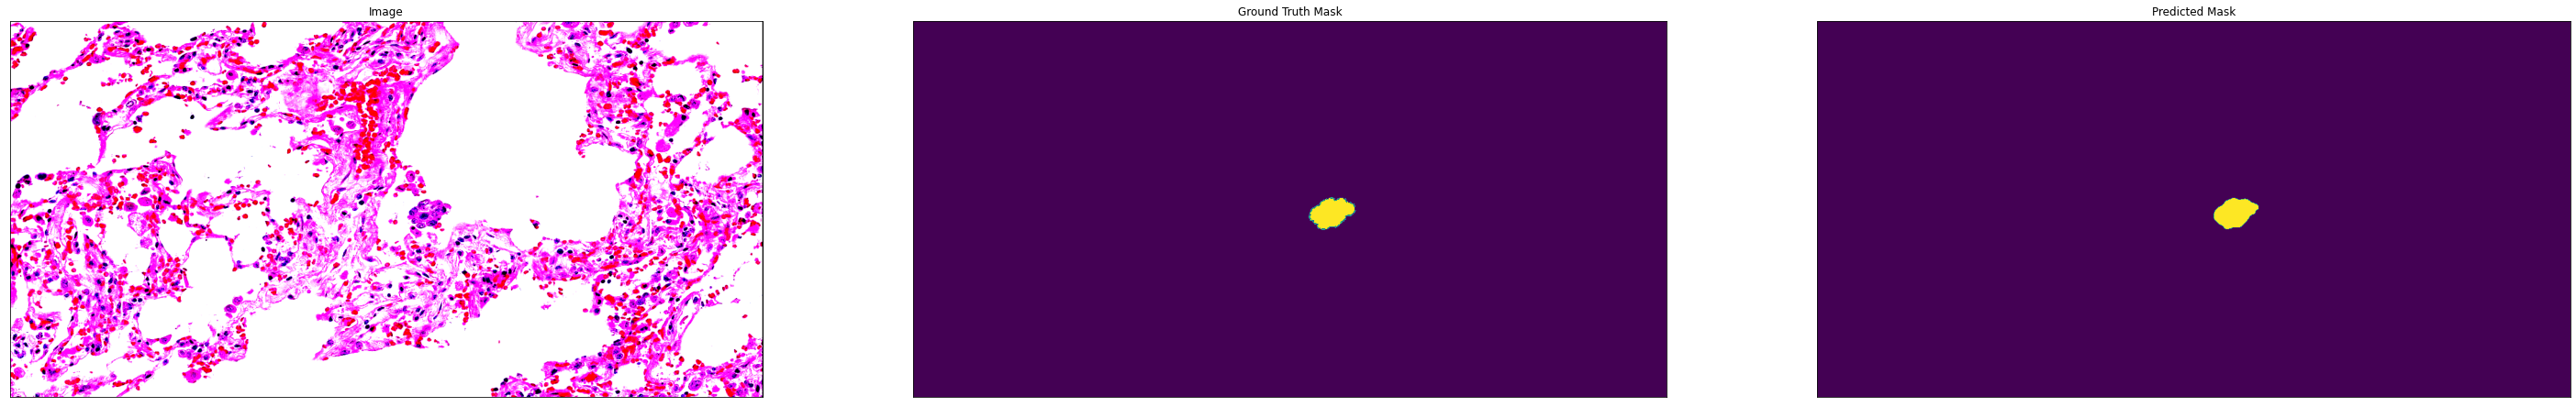

In [4]:
from dataloader import splitdataset
import segmentation_models_pytorch as smp
import os, torch

ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
DEVICE = 'cuda'
ACTIVATION = 'sigmoid'
dataset_root = './SEG_Train_Datasets'
img_path = os.path.join(dataset_root, 'Train_Images')
mask_path = os.path.join(dataset_root, 'Train_Masks')
classes = ['stas']
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)
trainset, testset = splitdataset(img_path, mask_path, classes, preprocessing_fn)

model = torch.load('./result/unet_res50_imgnet/model_weight.pth')['state_dict']

inference_dataloader(model, testset, DEVICE)